#####################################################
msl_1357911.csv
#####################################################
Total Villages:  133903
Positive Slope:  44853
Negative Slope:  48403
No Change, Zero Slope:  40647
max Slope value is : 0.5142857142857143
min Slope value is : -0.5142857142857143
[    0     0     0     0     0   116   755  2042  8023 18515 18952 57832
 18421  6735  1827   543   142     0     0     0     0]


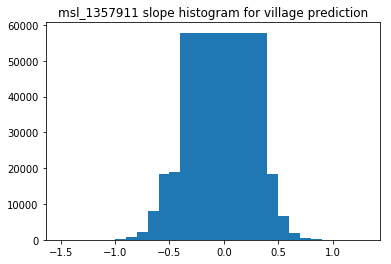

#####################################################
bf_1357911.csv
#####################################################
Total Villages:  133903
Positive Slope:  19384
Negative Slope:  23827
No Change, Zero Slope:  90692
max Slope value is : 0.5142857142857143
min Slope value is : -0.5142857142857143
[    0     0     0     0     0    30   222   463  3311  9435 10366 98467
  8319  2617   503   130    40     0     0     0     0]


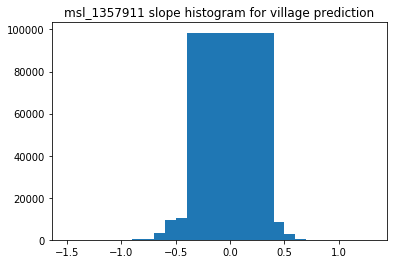

#####################################################
emp_1357911.csv
#####################################################
Total Villages:  133903
Positive Slope:  23651
Negative Slope:  34258
No Change, Zero Slope:  75994
max Slope value is : 0.5142857142857143
min Slope value is : -0.5142857142857143
[    0     0     0     0     0    96   867  1356  6710 13311 11918 85237
  9542  3466   954   326   120     0     0     0     0]


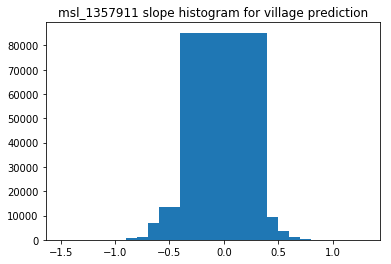

#####################################################
fc_1357911.csv
#####################################################
Total Villages:  133903
Positive Slope:  33617
Negative Slope:  23836
No Change, Zero Slope:  76450
max Slope value is : 0.5142857142857143
min Slope value is : -0.5142857142857143
[    0     0     0     0     0   183   632   917  3961  8289  9854 86300
 14735  6706  1271   726   329     0     0     0     0]


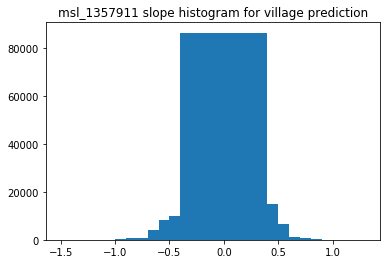

#####################################################
msw_1357911.csv
#####################################################
Total Villages:  133903
Positive Slope:  43231
Negative Slope:  40784
No Change, Zero Slope:  49888
max Slope value is : 0.5142857142857143
min Slope value is : -0.5142857142857143
[    0     0     0     0     0   416  1449  1926  8197 12417 16379 63442
 17321  8872  1743  1122   619     0     0     0     0]


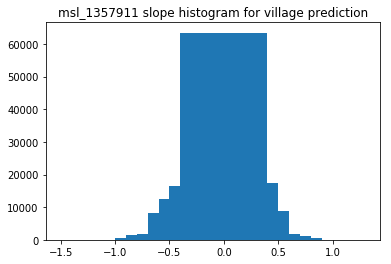

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats

fileName='msl_1357911.csv'
fileList=['msl_1357911.csv','bf_1357911.csv','emp_1357911.csv','fc_1357911.csv','msw_1357911.csv']


for filename in fileList:
    print("#####################################################")
    print(filename)
    print("#####################################################")

    df = pd.read_csv(filename)
    df.dropna(inplace=True)

    columnsPrediction=['predicted_2001','predicted_2003','predicted_2005','predicted_2007','predicted_2009','predicted_2011']
    subsetPredictionData=df[columnsPrediction]
    #print(subsetPredictionData.head())

    axisvalues=list(range(1,len(subsetPredictionData.columns)+1))
    def calc_slope(row):
        a = scipy.stats.linregress(axisvalues, y=row)
        return pd.Series(a._asdict())


    regressionData= (subsetPredictionData.apply(calc_slope,axis=1))

    print('Total Villages: ',regressionData['slope'].shape[0])
    print('Positive Slope: ',np.sum(regressionData['slope']>0))
    print('Negative Slope: ',np.sum(regressionData['slope']<0))
    print('No Change, Zero Slope: ',np.sum(regressionData['slope']==0.0))

    tempArray = (regressionData['slope'].values)
    #print('tempArray.shape',tempArray.shape)
    print('max Slope value is :',max(tempArray))
    print('min Slope value is :',min(tempArray))
    bins_1 = np.array([t/10 for t in range(-11,11)])
    binning=np.histogram(tempArray, bins=bins_1)
    print(binning[0])
    # x = np.arange(len(binning[0]))
    x= bins_1[:-1]
    #print('sum(binning[0])',sum(binning[0]))
    plt.clf()
    plt.bar(x, binning[0])
    plt.title(fileName[:-4]+' slope histogram for village prediction')
    plt.show()
    regressedDf=pd.concat([df, regressionData], axis=1)
    #print(regressedDf.head())
    regressedDf.to_csv(fileName[:-4]+'_RegressionLine'+'.csv',index=False)
